In [ ]:
from google.colab import files


In [ ]:
files.upload()

Saving data500.csv to data500.csv


{'data500.csv': b'numbers\r\n255\r\n78\r\n768\r\n187\r\n481\r\n53\r\n948\r\n760\r\n820\r\n532\r\n205\r\n998\r\n406\r\n12\r\n456\r\n624\r\n335\r\n135\r\n589\r\n623\r\n332\r\n327\r\n394\r\n106\r\n932\r\n899\r\n406\r\n895\r\n523\r\n612\r\n259\r\n786\r\n561\r\n80\r\n575\r\n935\r\n249\r\n680\r\n117\r\n825\r\n65\r\n325\r\n865\r\n931\r\n353\r\n541\r\n289\r\n405\r\n210\r\n721\r\n474\r\n706\r\n992\r\n931\r\n15\r\n797\r\n18\r\n936\r\n662\r\n840\r\n192\r\n719\r\n122\r\n936\r\n517\r\n228\r\n576\r\n675\r\n961\r\n814\r\n681\r\n134\r\n412\r\n638\r\n690\r\n523\r\n963\r\n994\r\n926\r\n824\r\n638\r\n495\r\n680\r\n9\r\n317\r\n500\r\n850\r\n994\r\n454\r\n99\r\n334\r\n850\r\n249\r\n780\r\n635\r\n244\r\n318\r\n848\r\n352\r\n889\r\n791\r\n840\r\n570\r\n473\r\n220\r\n172\r\n338\r\n447\r\n392\r\n958\r\n905\r\n572\r\n365\r\n410\r\n736\r\n624\r\n392\r\n690\r\n112\r\n907\r\n90\r\n687\r\n650\r\n4\r\n133\r\n804\r\n87\r\n501\r\n247\r\n600\r\n208\r\n198\r\n230\r\n338\r\n793\r\n527\r\n220\r\n459\r\n769\r\n27\r\n498\r\

Brute Force - Minimum stock price: 4.0
Brute Force - Maximum stock price: 998.0
Time taken by Brute Force: 0.000166 seconds

Divide and Conquer - Minimum stock price: 4.0
Divide and Conquer - Maximum stock price: 998.0
Time taken by Divide and Conquer: 0.000897 seconds


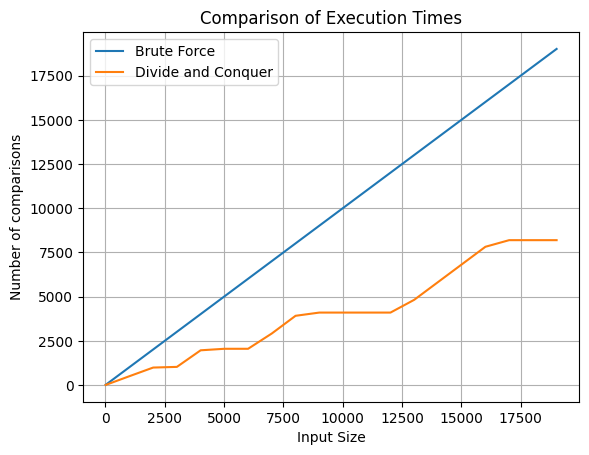

In [ ]:
import csv
import time
import random
import matplotlib.pyplot as plt

def find_min_max_bruteforce(prices):
    if not prices:
        return None, None

    min_price = max_price = prices[0]
    count=0
    for price in prices:
        if price < min_price:
            count+=1
            min_price = price
        elif price > max_price:
            count+=1
            max_price = price

    return min_price, max_price,count

def find_min_max_divide_conquer(prices,count=0):
    count=0
    if not prices:
        return None, None

    if len(prices) == 1:
        return prices[0], prices[0],count

    if len(prices) == 2:
        count+=1
        return (prices[0], prices[1],count) if prices[0] < prices[1] else (prices[1], prices[0],count)

    mid = len(prices) // 2
    left_min, left_max ,c_l= find_min_max_divide_conquer(prices[:mid],count)
    right_min, right_max ,c_r= find_min_max_divide_conquer(prices[mid:],count)

    count=c_l+c_r
    return min(left_min, right_min), max(left_max, right_max),count


stock_prices = []


with open('data500.csv', 'r') as file:
    csv_reader = csv.reader(file)


    next(csv_reader, None)


    for row in csv_reader:
          price = float(row[0])
          stock_prices.append(price)



start_time = time.time()
min_price_bruteforce, max_price_bruteforce ,c_bf= find_min_max_bruteforce(stock_prices)
end_time = time.time()
bruteforce_time = end_time - start_time


start_time = time.time()
min_price_divide_conquer, max_price_divide_conquer,c_dc = find_min_max_divide_conquer(stock_prices)
end_time = time.time()
divide_conquer_time = end_time - start_time

print(f"Brute Force - Minimum stock price: {min_price_bruteforce}")
print(f"Brute Force - Maximum stock price: {max_price_bruteforce}")
print(f"Time taken by Brute Force: {bruteforce_time:.6f} seconds\n")

print(f"Divide and Conquer - Minimum stock price: {min_price_divide_conquer}")
print(f"Divide and Conquer - Maximum stock price: {max_price_divide_conquer}")
print(f"Time taken by Divide and Conquer: {divide_conquer_time:.6f} seconds")

execution_times_bruteforce = []
execution_times_divide_conquer = []
input_sizes = []


for input_size in range(10, 20000, 1000):
    input_sizes.append(input_size)


    random_prices = [i for i in range(input_size)]



    c_bf=find_min_max_bruteforce(random_prices)[-1]

    execution_times_bruteforce.append(c_bf)


    c_dc=find_min_max_divide_conquer(random_prices)[-1]

    execution_times_divide_conquer.append(c_dc)


plt.plot(input_sizes, execution_times_bruteforce, label='Brute Force')
plt.plot(input_sizes, execution_times_divide_conquer, label='Divide and Conquer')
plt.xlabel('Input Size')
plt.ylabel('Number of comparisons')
plt.title('Comparison of Execution Times')
plt.legend()
plt.grid(True)
plt.show()


Time taken to sort 1000 elements: 0.0072209835052490234 seconds
Time taken to sort 5000 elements: 0.01628255844116211 seconds
Time taken to sort 10000 elements: 0.03320646286010742 seconds
Time taken to sort 20000 elements: 0.0649864673614502 seconds
Time taken to sort 30000 elements: 0.1041116714477539 seconds


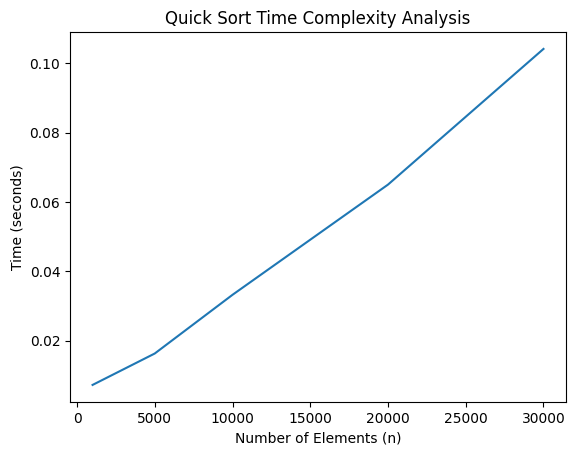

In [ ]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    return quick_sort(left) + middle + quick_sort(right)

import random


n_values = [1000, 5000, 10000, 20000, 30000]
time_records = []

for n in n_values:
    random_integers = [random.randint(1, 100000) for _ in range(n)]

    start_time = time.time()
    sorted_integers = quick_sort(random_integers)
    end_time = time.time()

    time_taken = end_time - start_time
    time_records.append(time_taken)

    print(f"Time taken to sort {n} elements:", time_taken, "seconds")

plt.plot(n_values, time_records)
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.title('Quick Sort Time Complexity Analysis')
plt.show()
